In this file we will look at the output of finding the rates of different binaries after having run the slurm job (on the loss mass COMPAS output)

I will look at both executes of rates of all DCOS+WD and just WD

I will also look at the separations of the mass combinations of the WD+WD systems that merge within a hubble time

I will also look at the total mass distirbutions of all WD+WD and see what separations would make different combinations to merge

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from useful_fncs import tgw,WD_BINARY_BOOLS

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [63]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_NS.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [64]:
list(Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [65]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [66]:
display(rates_info['SEED'])
display(rates_info['DCOmask'])
print(sum(rates_info['DCOmask'][()])) # this is summing the trues that are BNS that merged within a hubble time (same as number of SEEDs in this rate info H5 file)
display(rates_info['merger_rate']) #80 redshift bins 
display(rates_info['redshifts'])
print(rates_info['redshifts'][()])

<HDF5 dataset "SEED": shape (19,), type "<u8">

<HDF5 dataset "DCOmask": shape (360,), type "|b1">

19


<HDF5 dataset "merger_rate": shape (19, 80), type "<f8">

<HDF5 dataset "redshifts": shape (80,), type "<f8">

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [67]:
# reading in the HDF5 file
pathToSM_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_LowMass_1.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)

In [68]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_data = pd.DataFrame() # making a pandas dataframe

for key in Data_2["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_data[key] = Data_2["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [69]:
dco_mask = rates_info['DCOmask'][()]
merging_NSNS = DCO_data[dco_mask]

In [70]:
print(np.shape(rates_info['merger_rate'][:,0]))

(19,)


In [71]:
merging_NSNS['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_532773/4163823339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_NSNS['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [72]:
merging_NSNS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),merger_rate_z0
15,1,4.748315,0.623930,0,b'2 ',b'4-8 ',1.260126,1.322620,1,0.000323,0,1,1,0,418855,0.004341,13,13,33.649443,0.000126,-1.694017,0.0,0.0,0.000855
23,1,3.162000,0.418140,0,b'2 ',b'4-8 ',1.260180,1.277584,1,0.000511,0,1,1,0,438875,0.002976,13,13,35.372554,0.000180,-1.657328,0.0,0.0,0.004354
29,1,34.065425,0.189972,0,b'4-8 ',b'8 ',1.277719,1.277584,1,0.001198,0,1,1,0,651313,0.004731,13,13,40.497868,0.000135,-1.335271,0.0,0.0,0.057433
60,1,31.483034,0.163235,0,b'5 ',b'8 ',1.277732,1.277584,1,0.004774,0,1,1,0,451628,0.004599,13,13,29.821243,0.000149,-1.317773,0.0,0.0,1.155829
75,1,85.827476,0.459599,0,b'4-8 ',b'8 ',1.277633,1.277584,1,0.000840,0,1,1,0,761020,0.007103,13,13,40.301712,0.000049,-1.432305,0.0,0.0,0.020778
86,1,1563.689829,0.437393,0,b'5 ',b'8 ',1.668267,1.493917,1,0.007143,0,1,1,0,738621,0.016834,13,13,16.502195,0.000020,-1.385497,0.0,0.0,2.550545
153,1,2658.001673,0.583687,0,b'5 ',b'8 ',1.775825,1.613424,1,0.012691,0,1,1,0,519339,0.024207,13,13,14.905412,0.000018,-1.393037,0.0,0.0,5.226306
174,1,2.456000,0.571036,0,b'2-8 ',b'4-8 ',1.260127,1.373905,1,0.000221,0,1,1,0,130780,0.003428,13,13,37.736467,0.000127,-1.747179,0.0,0.0,0.000197
191,1,50.351583,0.156808,0,b'2 ',b'4-8 ',1.260129,1.277584,1,0.006075,0,1,1,0,197130,0.005136,13,13,41.552101,0.000129,-1.262143,0.0,0.0,1.675444
192,1,288.911579,0.511055,0,b'2 ',b'4-8 ',1.260030,1.349386,1,0.016219,0,1,1,0,198500,0.010346,13,13,29.946002,0.000030,-1.355765,0.0,0.0,4.595955


In [73]:
# this is the rate at redhsif zero (check expectations with Ligo paper 2023 - see on their website)
print(sum(merging_NSNS['merger_rate_z0']))

34.758742306206145


Text(0, 0.5, 'dR/dM')

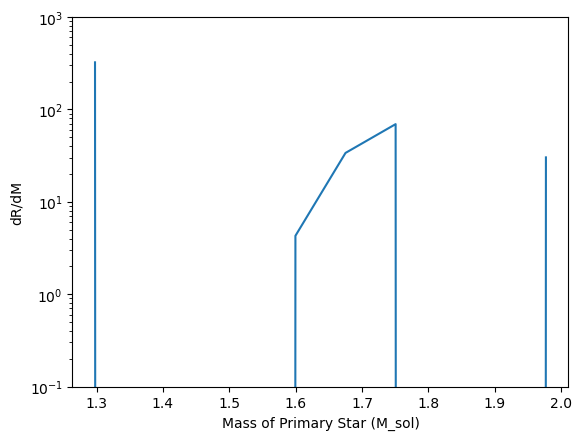

In [74]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_NSNS['Mass(1)'], weights=merging_NSNS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_NSNS['Mass(1)'], weights=merging_NSNS['merger_rate_z0'])
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM")

#### Doing rates analysis on the AIS WD hdf5 output

In [62]:
# reading in the HDF5 file
pathTorates_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/Rate_info_WD_UPDATE.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [63]:
Data_rates.keys()

<KeysViewHDF5 ['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']>

In [64]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [65]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [66]:
# reading in the HDF5 file
pathToweights_H5 = '/mnt/home/msantiago/ceph/data/CosmicIntegration/CosmicIntegration/COMPAS_Output_wWeights_SM_3.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [67]:
Data_weights.keys()

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_Pulsar_Evolution', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>

In [68]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

In [69]:
# gathering the seeds from the rates.h5 file
dco_mask = rates_info['DCOmask'][()]
merging_all_WD = DCO_WD_data[dco_mask]

In [70]:
print(np.shape(rates_info['merger_rate'][:,0]))

(1205,)


In [71]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_331499/2127216249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [72]:
merging_all_WD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight,merger_rate_z0
500,2,0.004316,0.0,1,"b""b'5 '""","b""b'3 '""",0.593913,0.246345,1,0.001883,0,1,NaN,NaN,13,0.043346,11,10,2203.361047,6.633484,1.775575
501,2,0.005958,0.0,1,"b""b'5 '""","b""b'3 '""",0.804574,0.263241,1,0.000173,0,1,NaN,NaN,282,0.054719,11,10,1661.616350,9.812540,0.001202
502,1,0.000176,0.0,1,"b""b'1-2 '""","b""b'3 '""",0.245348,0.270718,1,0.000152,0,1,NaN,NaN,390,0.014152,10,10,1987.560727,10.000000,0.000843
503,1,0.001535,0.0,1,"b""b'2 '""","b""b'3 '""",0.517893,0.215305,1,0.003247,0,1,NaN,NaN,678,0.030230,11,10,2808.980120,9.999974,9.074343
504,1,0.009975,0.0,1,"b""b'1-2 '""","b""b'3 '""",0.211159,0.285340,1,0.000270,0,1,NaN,NaN,682,0.037536,10,10,6553.614307,10.000000,0.058916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2,0.012863,0.0,1,"b""b'3 '""","b""b'3 '""",0.470100,0.245102,1,0.000381,0,1,NaN,NaN,990696,0.051532,10,10,3876.053724,1.411546,0.007063
1701,2,0.001339,0.0,1,"b""b'3 '""","b""b'3 '""",0.390258,0.197062,1,0.001889,0,1,NaN,NaN,994640,0.025186,10,10,4344.323222,1.385454,0.599439
1702,2,0.007254,0.0,1,"b""b'3 '""","b""b'3 '""",0.456693,0.237171,1,0.000294,0,1,NaN,NaN,995736,0.043641,10,10,3659.690788,1.135102,0.002176
1703,2,0.003109,0.0,1,"b""b'3 '""","b""b'3 '""",0.419092,0.177682,1,0.002185,0,1,NaN,NaN,996451,0.030964,10,10,9220.525957,4.504378,13.288757


#### Rates Calculation

In [91]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(merging_all_WD['Time'])
t_col_lg = np.array(merging_all_WD['Coalescence_Time'])

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(merging_all_WD.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)

Text(12350, 1, 'Hubble Time')

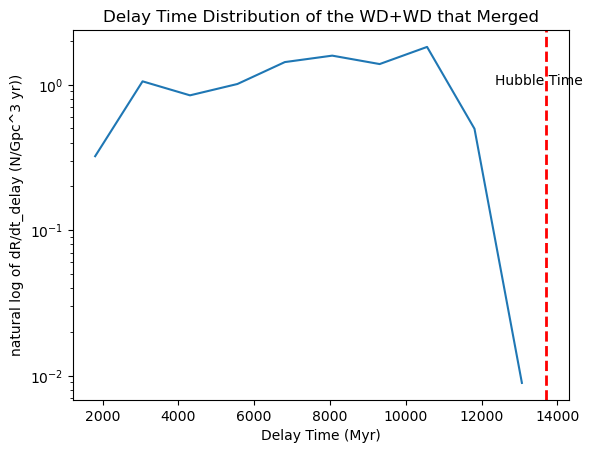

In [103]:
# let's make a histogram of the delay times of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(t_delay_lg, weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Delay Time (Myr)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("natural log of dR/dt_delay (N/Gpc^3 yr))")
plt.title("Delay Time Distribution of the WD+WD that Merged")

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2)
plt.text(12350, 10**0, "Hubble Time", fontsize=10)

In [73]:
# take these systems + check tthe immediate RLOF flag
# going into RLOF afte the CE was sucessfully ejected because stars are so close together
# however this CE ejection may no have actually been sucessful and could have MT and merged before ejection
# check if these systems are also stellar merges
rlof_ce_bool = merging_all_WD['Immediate_RLOF>CE']==True
sum(rlof_ce_bool)

1205

In [74]:
# if these are true then CE on the hertzbrung gab (star would be increasing too rapidly)
ce_bool = merging_all_WD['Optimistic_CE']==True
sum(ce_bool)

0

Text(0.5, 1.0, 'Total Mass Distribution of the WD+WD that Merged')

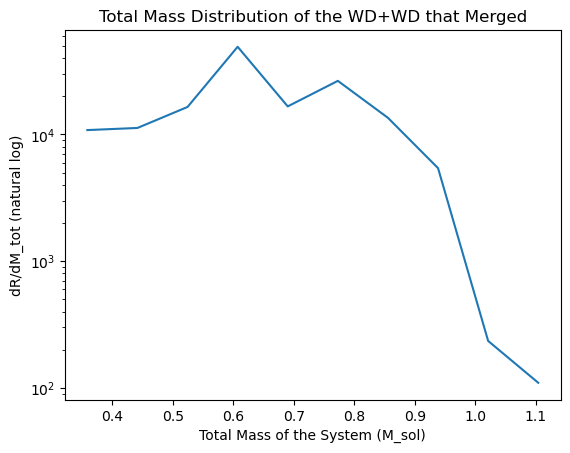

In [75]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)']+merging_all_WD['Mass(2)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Total Mass of the System (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM_tot (natural log)")
plt.title("Total Mass Distribution of the WD+WD that Merged")

Text(0.5, 1.0, 'Mass Distribution of the Primary Star')

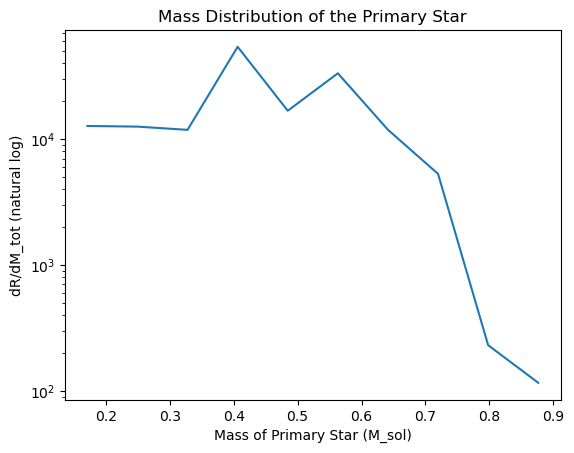

In [76]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM_tot (natural log)")
plt.title("Mass Distribution of the Primary Star")

Text(0.5, 1.0, 'Separation Distribution')

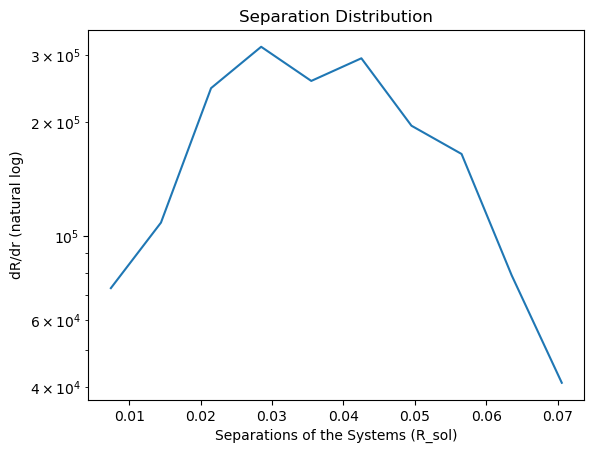

In [77]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['SemiMajorAxis@DCO'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Separations of the Systems (R_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e5)
plt.ylabel("dR/dr (natural log)")
plt.title("Separation Distribution")

Let's look at the stellar types and if there are any places where there are oxygen/neon white dwarfs

In [78]:
ONeWD_bool = np.logical_or(merging_all_WD['Stellar_Type(1)']==12,merging_all_WD['Stellar_Type(2)']==12)
sum(ONeWD_bool)

0

It seems liek there are no systems that merged within a hubble time that are oxygen neon white dwarfs

In [79]:
OtherWD_bool = np.logical_or(merging_all_WD['Stellar_Type(1)']==10,merging_all_WD['Stellar_Type(2)']==11)
sum(OtherWD_bool)

801

Text(0, 0.5, 'Stellar Type of Secondary Star')

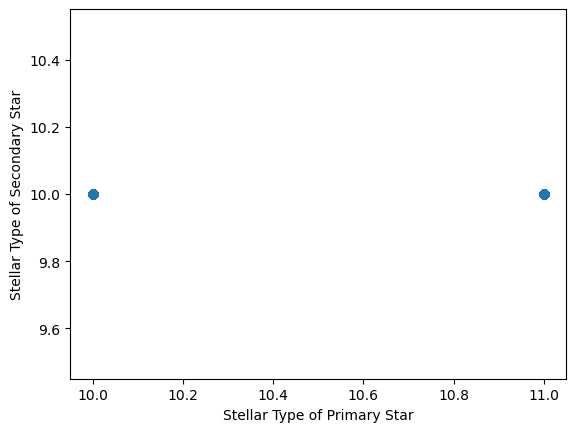

In [80]:
plt.scatter(merging_all_WD['Stellar_Type(1)'],merging_all_WD['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

#### Let's look at different mass combinations of the WD+WD

In [81]:
# let's gather the system parameters group 

SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [82]:
# let's take the seeds from the DCO_mask
# gathering the seeds from the rates.h5 file

dco_seed_mask = rates_info['SEED'][()]
overlap_seeds_bool = np.in1d(SP_WD_data['SEED'],dco_seed_mask)

SP_merging_all_WD = SP_WD_data[overlap_seeds_bool]

In [83]:
SP_merging_all_WD

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
13,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.593913,0.246345,1.888582,1.430485,1,0,0.001883,0.001883,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,0.043346,1.194675,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2203.361047,0,1.0,6.633484
282,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.804574,0.263241,2.559901,1.498617,1,0,0.000173,0.000173,0.0,0.0,0,1,282,0.101516,0.391722,0.295351,0.761335,-0.407165,-0.930712,0.193855,6.233391,0.054719,1.265116,265.0,265.0,30.0,30.0,11,10,1,1,0.0,1661.616350,0,1.0,9.812540
390,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.245348,0.270718,1.864383,0.879989,1,0,0.000152,0.000152,0.0,0.0,0,1,390,0.638525,0.563484,1.285136,6.110702,-0.103642,0.144511,0.677543,5.528398,0.014152,0.016368,265.0,265.0,30.0,30.0,10,10,1,1,0.0,1987.560727,0,1.0,10.000000
678,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'2 ',b'3 ',0.517893,0.215305,3.469111,1.239958,1,0,0.003247,0.003247,0.0,0.0,0,1,678,0.919455,0.550116,2.727400,4.401147,0.062821,0.528544,2.538474,0.421584,0.030230,0.048591,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2808.980120,0,1.0,9.999974
682,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.211159,0.285340,1.409574,0.735179,1,0,0.000270,0.000270,0.0,0.0,0,1,682,0.699443,0.380188,6.209512,2.013284,-0.792668,0.129883,0.825178,2.059652,0.037536,0.023954,265.0,265.0,30.0,30.0,10,10,1,1,0.0,6553.614307,0,1.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.470100,0.245102,1.579281,1.147624,1,0,0.000381,0.000381,0.0,0.0,0,1,990696,0.522491,0.760319,2.324036,1.632675,0.649350,-0.239432,2.754680,0.610730,0.051532,0.781763,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3876.053724,0,1.0,1.411546
994640,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.390258,0.197062,1.636905,1.143355,1,0,0.001889,0.001889,0.0,0.0,0,1,994640,0.340462,0.134833,4.885396,4.078910,-1.521185,0.107456,2.682743,1.331618,0.025186,0.625782,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4344.323222,0,1.0,1.385454
995736,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.456693,0.237171,1.535040,1.163256,1,0,0.000294,0.000294,0.0,0.0,0,1,995736,0.791869,0.453936,2.789666,0.552527,0.050858,-0.325226,1.544295,3.218876,0.043641,0.661934,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3659.690788,0,1.0,1.135102
996451,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.419092,0.177682,1.409679,0.922890,1,0,0.002185,0.002185,0.0,0.0,0,1,996451,0.379445,0.895692,5.076869,0.161869,-0.821010,-1.224126,4.623775,4.818819,0.030964,0.904166,265.0,265.0,30.0,30.0,10,10,1,1,0.0,9220.525957,0,1.0,4.504378


Let's add the rates info to this table as well

In [84]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
SP_merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_331499/2194420057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SP_merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [85]:
pd.set_option('display.max_columns', None)
display(SP_merging_all_WD)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
13,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.593913,0.246345,1.888582,1.430485,1,0,0.001883,0.001883,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,0.043346,1.194675,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2203.361047,0,1.0,6.633484,1.775575
282,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.804574,0.263241,2.559901,1.498617,1,0,0.000173,0.000173,0.0,0.0,0,1,282,0.101516,0.391722,0.295351,0.761335,-0.407165,-0.930712,0.193855,6.233391,0.054719,1.265116,265.0,265.0,30.0,30.0,11,10,1,1,0.0,1661.616350,0,1.0,9.812540,0.001202
390,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.245348,0.270718,1.864383,0.879989,1,0,0.000152,0.000152,0.0,0.0,0,1,390,0.638525,0.563484,1.285136,6.110702,-0.103642,0.144511,0.677543,5.528398,0.014152,0.016368,265.0,265.0,30.0,30.0,10,10,1,1,0.0,1987.560727,0,1.0,10.000000,0.000843
678,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'2 ',b'3 ',0.517893,0.215305,3.469111,1.239958,1,0,0.003247,0.003247,0.0,0.0,0,1,678,0.919455,0.550116,2.727400,4.401147,0.062821,0.528544,2.538474,0.421584,0.030230,0.048591,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2808.980120,0,1.0,9.999974,9.074343
682,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.211159,0.285340,1.409574,0.735179,1,0,0.000270,0.000270,0.0,0.0,0,1,682,0.699443,0.380188,6.209512,2.013284,-0.792668,0.129883,0.825178,2.059652,0.037536,0.023954,265.0,265.0,30.0,30.0,10,10,1,1,0.0,6553.614307,0,1.0,10.000000,0.058916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.470100,0.245102,1.579281,1.147624,1,0,0.000381,0.000381,0.0,0.0,0,1,990696,0.522491,0.760319,2.324036,1.632675,0.649350,-0.239432,2.754680,0.610730,0.051532,0.781763,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3876.053724,0,1.0,1.411546,0.007063
994640,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.390258,0.197062,1.636905,1.143355,1,0,0.001889,0.001889,0.0,0.0,0,1,994640,0.340462,0.134833,4.885396,4.078910,-1.521185,0.107456,2.682743,1.331618,0.025186,0.625782,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4344.323222,0,1.0,1.385454,0.599439
995736,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.456693,0.237171,1.535040,1.163256,1,0,0.000294,0.000294,0.0,0.0,0,1,995736,0.791869,0.453936,2.789666,0.552527,0.050858,-0.325226,1.544295,3.218876,0.043641,0.661934,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3659.690788,0,1.0,1.135102,0.002176
996451,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.419092,0.177682,1.409679,0.922890,1,0,0.002185,0.002185,0.0,0.0,0,1,996451,0.379445,0.895692,5.076869,0.161869,-0.821010,-1.224126,4.623775,4.818819,0.030964,0.904166,265.0,265.0,30.0,30.0,10,10,1,1,0.0,9220.525957,0,1.0,4.504378,13.288757


In [86]:
# filter for things that are flagged as being stellar mergers and also have RLOF_after_CE flag true
# this is like before where the core of a red giant is within the commom envelope and merges with another WD and then produces a merged within the CE not after the CE is sucessfully ejected
merger_bool = SP_merging_all_WD['Merger']==True
sum(merger_bool)

1205

In [87]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_WD = Data_weights['BSE_System_Parameters']
print(SPs_WD['Mass(1)'].attrs['units']) 
print(SPs_WD['SemiMajorAxis'].attrs['units'])
print(SPs_WD['Time'].attrs['units'])

b'Msol'
b'Rsol'
b'Myr'


Let's separate these systems between HeWD and COWD

Text(0, 0.5, 'Stellar Type of Secondary Star')

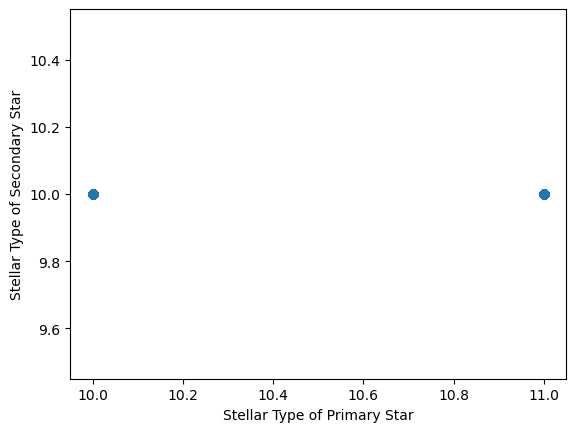

In [28]:
plt.scatter(SP_merging_all_WD['Stellar_Type(1)'],SP_merging_all_WD['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

Let's select for stellar types that are just HeWD+HeWD and COWD+COWD

In [29]:
hewd_bool = np.logical_or(np.logical_and(SP_merging_all_WD['Stellar_Type(1)']==10,SP_merging_all_WD['Stellar_Type(2)']==10),np.logical_and(SP_merging_all_WD['Stellar_Type(1)']==10,SP_merging_all_WD['Stellar_Type(2)']==11))
HeWD_SYS = SP_merging_all_WD[hewd_bool]

cowd_bool = np.logical_or(np.logical_and(SP_merging_all_WD['Stellar_Type(1)']==11,SP_merging_all_WD['Stellar_Type(2)']==11),np.logical_and(SP_merging_all_WD['Stellar_Type(1)']==11,SP_merging_all_WD['Stellar_Type(2)']==10))
COWD_SYS = SP_merging_all_WD[cowd_bool]

#checking if these bools take care of all of the systems
print(sum(hewd_bool)+sum(cowd_bool))

1205


In [30]:
pd.set_option('display.max_columns', None)
display(HeWD_SYS)

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
390,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.245348,0.270718,1.864383,0.879989,1,0,0.000152,0.000152,0.0,0.0,0,1,390,0.638525,0.563484,1.285136,6.110702,-0.103642,0.144511,0.677543,5.528398,0.014152,0.016368,265.0,265.0,30.0,30.0,10,10,1,1,0.0,1987.560727,0,1.0,10.000000,0.000843
682,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.211159,0.285340,1.409574,0.735179,1,0,0.000270,0.000270,0.0,0.0,0,1,682,0.699443,0.380188,6.209512,2.013284,-0.792668,0.129883,0.825178,2.059652,0.037536,0.023954,265.0,265.0,30.0,30.0,10,10,1,1,0.0,6553.614307,0,1.0,10.000000,0.058916
915,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.184580,0.268106,1.221688,0.634600,1,0,0.000299,0.000299,0.0,0.0,0,1,915,0.108761,0.865113,1.179598,1.487009,0.242225,0.031670,3.662896,2.001149,0.052590,0.021281,265.0,265.0,30.0,30.0,10,10,1,0,0.0,13462.413335,0,1.0,10.000000,0.000000
1048,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'1-2 ',b'3 ',0.138062,0.258495,1.339440,0.630440,1,0,0.001587,0.001587,0.0,0.0,0,1,1048,0.687423,0.545792,5.330663,1.890118,0.727027,0.644805,5.314129,6.199865,0.018651,0.013691,265.0,265.0,30.0,30.0,10,10,1,0,0.0,6234.216147,0,1.0,10.000000,5.168919
1421,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.421959,0.196230,1.198150,0.849729,1,0,0.002224,0.002224,0.0,0.0,0,1,1421,0.861838,0.127361,0.642538,1.558790,-0.445509,0.231342,2.516426,0.078553,0.055152,0.975362,265.0,265.0,30.0,30.0,10,10,1,1,0.0,12772.943874,0,1.0,9.827268,0.365737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990696,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.470100,0.245102,1.579281,1.147624,1,0,0.000381,0.000381,0.0,0.0,0,1,990696,0.522491,0.760319,2.324036,1.632675,0.649350,-0.239432,2.754680,0.610730,0.051532,0.781763,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3876.053724,0,1.0,1.411546,0.007063
994640,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.390258,0.197062,1.636905,1.143355,1,0,0.001889,0.001889,0.0,0.0,0,1,994640,0.340462,0.134833,4.885396,4.078910,-1.521185,0.107456,2.682743,1.331618,0.025186,0.625782,265.0,265.0,30.0,30.0,10,10,1,1,0.0,4344.323222,0,1.0,1.385454,0.599439
995736,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.456693,0.237171,1.535040,1.163256,1,0,0.000294,0.000294,0.0,0.0,0,1,995736,0.791869,0.453936,2.789666,0.552527,0.050858,-0.325226,1.544295,3.218876,0.043641,0.661934,265.0,265.0,30.0,30.0,10,10,1,1,0.0,3659.690788,0,1.0,1.135102,0.002176
996451,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'3 ',b'3 ',0.419092,0.177682,1.409679,0.922890,1,0,0.002185,0.002185,0.0,0.0,0,1,996451,0.379445,0.895692,5.076869,0.161869,-0.821010,-1.224126,4.623775,4.818819,0.030964,0.904166,265.0,265.0,30.0,30.0,10,10,1,1,0.0,9220.525957,0,1.0,4.504378,13.288757


In [31]:
COWD_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight,merger_rate_z0
13,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.593913,0.246345,1.888582,1.430485,1,0,0.001883,0.001883,0.0,0.0,0,1,13,0.607341,0.237541,5.399983,5.179095,1.198511,0.543539,1.125655,2.849106,0.043346,1.194675,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2203.361047,0,1.0,6.633484,1.775575
282,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.804574,0.263241,2.559901,1.498617,1,0,0.000173,0.000173,0.0,0.0,0,1,282,0.101516,0.391722,0.295351,0.761335,-0.407165,-0.930712,0.193855,6.233391,0.054719,1.265116,265.0,265.0,30.0,30.0,11,10,1,1,0.0,1661.616350,0,1.0,9.812540,0.001202
678,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'2 ',b'3 ',0.517893,0.215305,3.469111,1.239958,1,0,0.003247,0.003247,0.0,0.0,0,1,678,0.919455,0.550116,2.727400,4.401147,0.062821,0.528544,2.538474,0.421584,0.030230,0.048591,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2808.980120,0,1.0,9.999974,9.074343
711,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.638210,0.198955,2.167488,1.197108,1,0,0.002035,0.002035,0.0,0.0,0,1,711,0.710000,0.660724,2.587224,2.767146,-0.767199,-0.666701,3.813868,2.471222,0.038416,0.930553,265.0,265.0,30.0,30.0,11,10,1,1,0.0,3779.062967,0,1.0,9.214704,4.131883
1010,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'2 ',b'3 ',0.331033,0.212897,2.344319,0.798401,1,0,0.000225,0.000225,0.0,0.0,0,1,1010,0.815915,0.175592,4.015816,0.456824,-0.663957,0.995304,0.777768,2.627146,0.048055,0.044067,265.0,265.0,30.0,30.0,11,10,1,1,0.0,11816.371586,0,1.0,10.000000,4.061026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944418,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.579084,0.232560,1.528265,1.083216,1,0,0.000213,0.000213,0.0,0.0,0,1,944418,0.238410,0.668647,5.471470,5.466873,-0.333461,1.282005,4.238780,1.190504,0.060070,0.780991,265.0,265.0,30.0,30.0,11,10,1,1,0.0,4609.074981,0,1.0,0.873953,0.000816
953779,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.915582,0.228913,3.565775,1.311146,1,0,0.005326,0.005326,0.0,0.0,0,1,953779,0.172777,0.714893,5.195678,4.274409,-1.161936,1.002575,0.962415,2.101766,0.064779,1.676604,265.0,265.0,30.0,30.0,11,10,1,1,0.0,3416.993138,0,1.0,3.468357,7.862233
954893,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.565551,0.205625,1.789812,1.060316,1,0,0.003111,0.003111,0.0,0.0,0,1,954893,0.777136,0.131261,4.116896,1.337146,0.879286,-0.128978,4.203816,0.902159,0.051206,0.961902,265.0,265.0,30.0,30.0,11,10,1,1,0.0,6172.851753,0,1.0,5.169716,9.024545
963827,0.0,0.0,1.0,2,0,0,0.0,0.0,0.0,0.0,0,0,12,1,1.5,b'5 ',b'3 ',0.629256,0.223491,1.908642,1.290816,1,0,0.000626,0.000626,0.0,0.0,0,1,963827,0.516854,0.030780,2.095320,5.810841,-0.180908,-0.336442,4.292825,5.407402,0.041046,0.878345,265.0,265.0,30.0,30.0,11,10,1,1,0.0,2673.819452,0,1.0,8.253728,0.135319


Let's look at a histogram of the masses for each setllar binary type

In [32]:
pratice_list = np.linspace(0,10,10)
print(pratice_list[1:])
print(pratice_list[:-1])

[ 1.11111111  2.22222222  3.33333333  4.44444444  5.55555556  6.66666667
  7.77777778  8.88888889 10.        ]
[0.         1.11111111 2.22222222 3.33333333 4.44444444 5.55555556
 6.66666667 7.77777778 8.88888889]


Text(0.5, 1.0, 'The Mass Spectrum of the Primary HeWD')

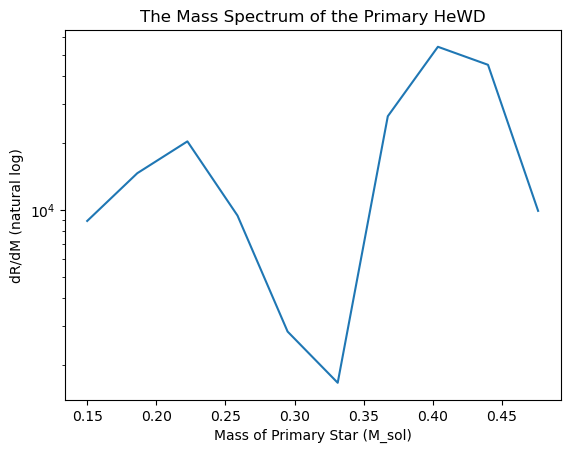

In [33]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(HeWD_SYS['Mass(1)'], weights=HeWD_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Primary HeWD")

Text(0.5, 1.0, 'Total Mass Spectrum of the Primary HeWD')

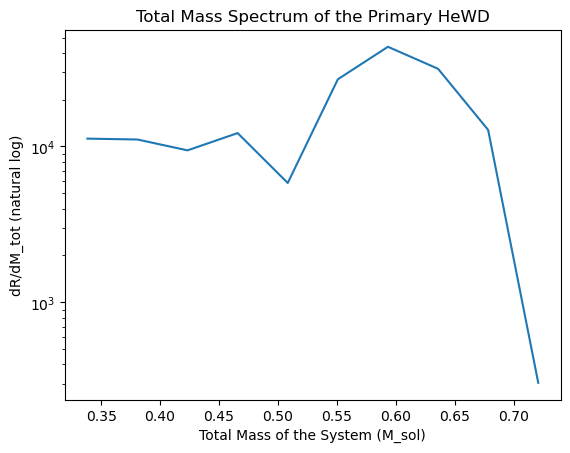

In [35]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(HeWD_SYS['Mass(1)']+HeWD_SYS['Mass(2)'], weights=HeWD_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Total Mass of the System (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM_tot (natural log)")
plt.title("Total Mass Spectrum of the Primary HeWD")

For HeWD, let's separate the mass bins into masses below 0.32 M_sun and above 0.32 Msun

In [30]:
HeWD_SYS_LOWM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']<0.32]
HeWD_SYS_HIGHM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']>0.32]

Text(0.5, 1.0, 'The Mass Spectrum of the Primary COWD')

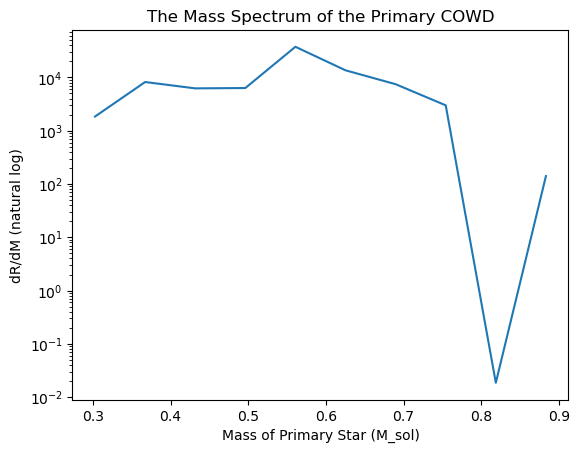

In [31]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(COWD_SYS['Mass(1)'], weights=COWD_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of Primary Star (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Primary COWD")

For COWD, let's separate the mass bins for below 0.8 M_sun and above 0.8 M_sun

In [32]:
COWD_SYS_LOWM = COWD_SYS.loc[COWD_SYS['Mass(1)']<0.8]
COWD_SYS_HIGHM = COWD_SYS.loc[COWD_SYS['Mass(1)']>0.8]

#### Within these bins let's look at what secondary mass is most common

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary HeWD (within M1<0.32)')

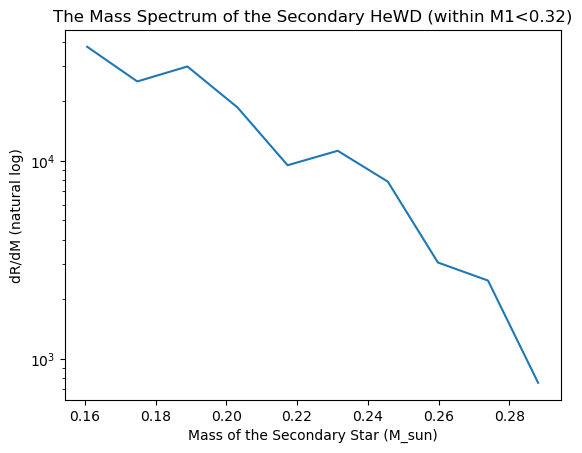

In [33]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(HeWD_SYS_LOWM['Mass(2)'], weights=HeWD_SYS_LOWM['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Secondary HeWD (within M1<0.32)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary HeWD (within M1>0.32)')

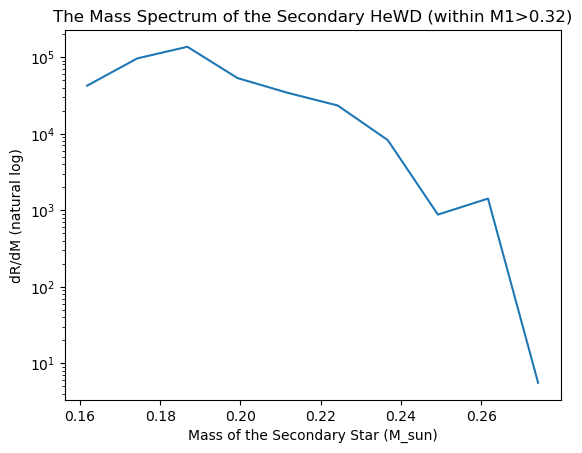

In [34]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(HeWD_SYS_HIGHM['Mass(2)'], weights=HeWD_SYS_HIGHM['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Secondary HeWD (within M1>0.32)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary COWD (within M1<0.80)')

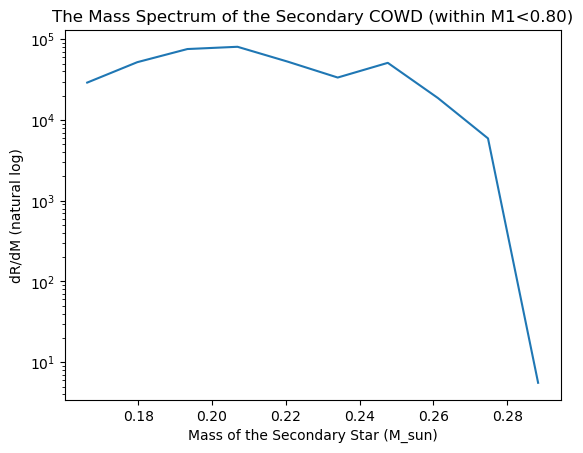

In [35]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(COWD_SYS_LOWM['Mass(2)'], weights=COWD_SYS_LOWM['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of the Secondary Star (M_sun)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Secondary COWD (within M1<0.80)")

Text(0.5, 1.0, 'The Mass Spectrum of the Secondary COWD (within M1>0.80)')

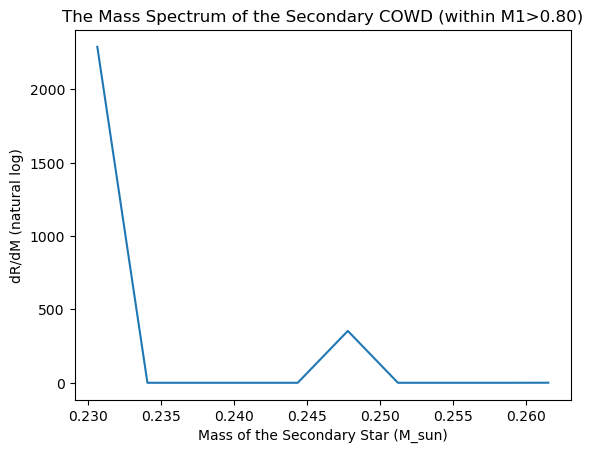

In [36]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(COWD_SYS_HIGHM['Mass(2)'], weights=COWD_SYS_HIGHM['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Mass of the Secondary Star (M_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Mass Spectrum of the Secondary COWD (within M1>0.80)")

So the results seem like likely couples:

HeWD:
- Mass(1)<0.32 + Mass(2) ~ 0.2 or Mass(2) ~ 0.17
- Mass(1)>0.32 + Mass(2) ~ 0.19

COWD:
- Mass(1)<0.8 + Mass(2) ~ 0.20
- Mass(1)>0.8 + Mass(2) ~ 0.232

Let's slice the data even more to look at the separations that would be needed for these stars to lead to a GW merger

This will allow us to see what mass combinations produce systems that have a coalescence time less than Hubble time

In [37]:
# selecting the common secondary mass ranges for the HeWDs
HeWD_LOWM_SEP = HeWD_SYS_LOWM.loc[np.logical_and(HeWD_SYS_LOWM['Mass(2)']>=0.16,HeWD_SYS_LOWM['Mass(2)']<=0.179)]
HeWD_HIGHM_SEP = HeWD_SYS_HIGHM.loc[np.logical_and(HeWD_SYS_HIGHM['Mass(2)']>=0.16,HeWD_SYS_HIGHM['Mass(2)']<=0.19)]

# selecting the common secondary mass ranges for the COWDs
COWD_LOWM_SEP = COWD_SYS_LOWM.loc[np.logical_and(COWD_SYS_LOWM['Mass(2)']>=0.18,COWD_SYS_LOWM['Mass(2)']<=0.24)]
COWD_HIGHM_SEP = COWD_SYS_HIGHM.loc[np.logical_and(COWD_SYS_HIGHM['Mass(2)']>=0.230,COWD_SYS_HIGHM['Mass(2)']<=0.26)]



Text(0.5, 1.0, 'The Separation Distirbution of HeWD + WD (with M1<0.32 0.16<M2>0.179)')

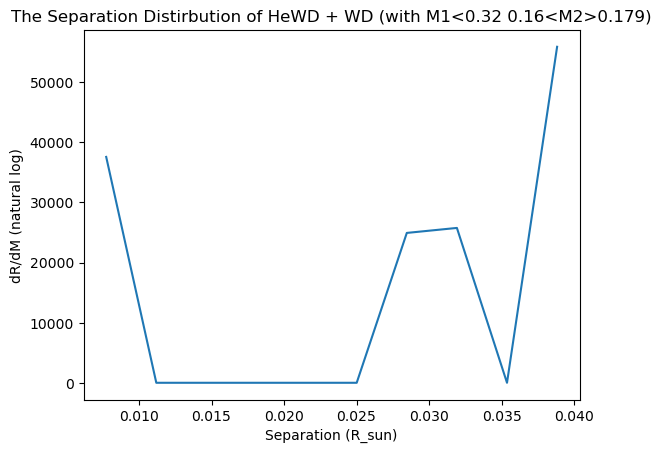

In [38]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(HeWD_LOWM_SEP['SemiMajorAxis'], weights=HeWD_LOWM_SEP['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Separation (R_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Separation Distirbution of HeWD + WD (with M1<0.32 0.16<M2>0.179)")

Text(0.5, 1.0, 'The Separation Distirbution of HeWD + WD (with M1>0.32 0.16<M2>0.19)')

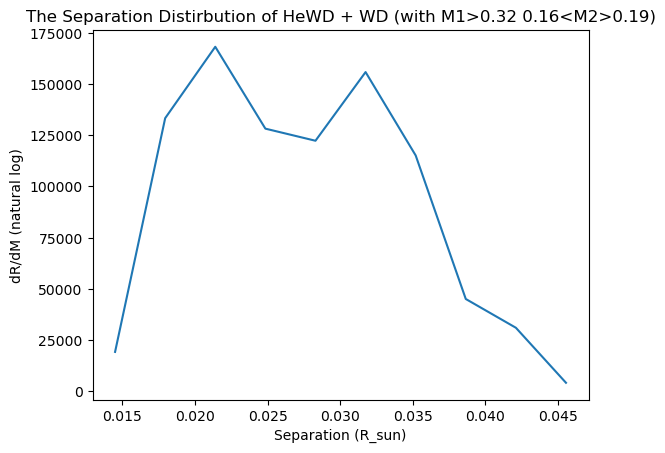

In [39]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(HeWD_HIGHM_SEP['SemiMajorAxis'], weights=HeWD_HIGHM_SEP['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Separation (R_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Separation Distirbution of HeWD + WD (with M1>0.32 0.16<M2>0.19)")

Text(0.5, 1.0, 'The Separation Distirbution of COWD + WD (with M1<0.8 0.18<M2>0.24)')

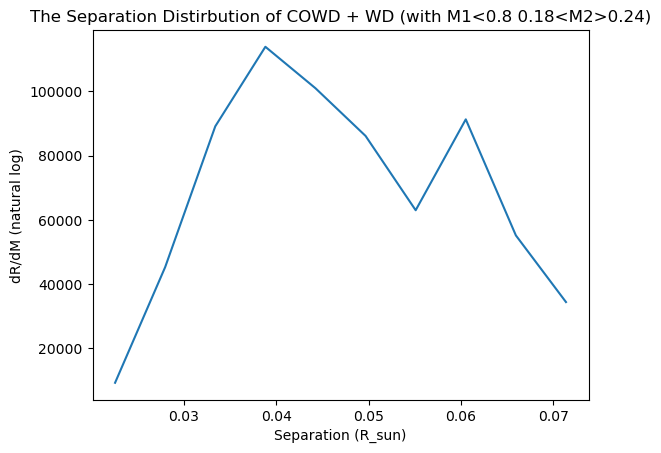

In [40]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(COWD_LOWM_SEP['SemiMajorAxis'], weights=COWD_LOWM_SEP['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Separation (R_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Separation Distirbution of COWD + WD (with M1<0.8 0.18<M2>0.24)")

Text(0.5, 1.0, 'The Separation Distirbution of COWD + WD (with M1>0.8 0.23<M2>0.232)')

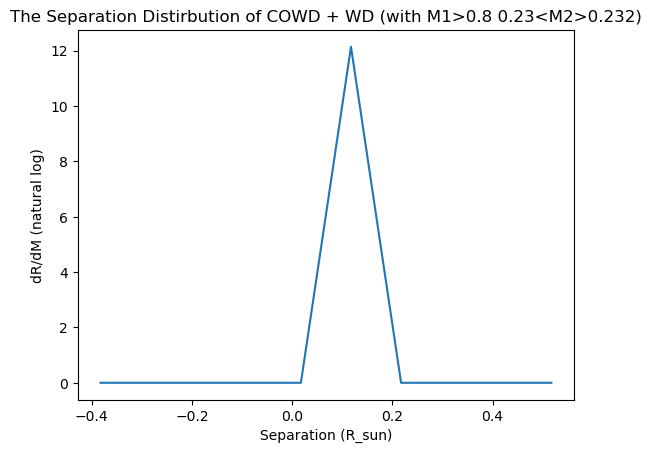

In [41]:
# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(COWD_HIGHM_SEP['SemiMajorAxis'], weights=COWD_HIGHM_SEP['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
plt.xlabel("Separation (R_sun)")
# plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM (natural log)")
plt.title("The Separation Distirbution of COWD + WD (with M1>0.8 0.23<M2>0.232)")

Let's use the peak of these separations distirbutions to find what the coalescence times of the different cases are

In [43]:

def tgw(a,e,Mmoremass,Mlessmass,Data,key,parameter):

    """
    Calcualte the coalescence time (inspiral time)
    a = semi major axis (expected in AU or Rsun)
    e = eccentricity
    Mmoremass = mass of the more massive compact object (expected in solar masses!)
    Mlessmass = mass of the less massive compact object (expected in solar masses!)
    """

    SYS = Data[key]
    sep_unit = SYS[parameter].attrs['units']
    if sep_unit == b'Rsol':
        a = (a * u.Rsun).to(u.m)

    elif sep_unit == b'AU':
        a = (a * u.AU).to(u.m)      

    Mmoremass = (Mmoremass * u.Msun).to(u.kg)
    Mlessmass = (Mlessmass * u.Msun).to(u.kg)

    tc = ((((5*((a)**4)*(const.c**5))/(256*(const.G**3)*(Mmoremass)*(Mlessmass)*((Mmoremass)+(Mlessmass))))*(1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2)))*((3.171e-8)*(u.yr/u.s))*((1e-6)*(u.Myr/u.yr))

    return tc.value

In [45]:
# analytically calulating the coalescence times
t_col_lowm2_he = tgw(a=0.0358, e=0.00, Mmoremass=0.23, Mlessmass=0.18, Data=Data_weights, key='BSE_System_Parameters', parameter='SemiMajorAxis')
t_col_highm2_he = tgw(a=0.023, e=0.00, Mmoremass=0.40, Mlessmass=0.19, Data=Data_weights, key='BSE_System_Parameters', parameter='SemiMajorAxis')
t_col_lowm2_co = tgw(a=0.04, e=0.00, Mmoremass=0.59, Mlessmass=0.20, Data=Data_weights, key='BSE_System_Parameters', parameter='SemiMajorAxis')
t_col_highm2_co = tgw(a=0.01, e=0.00, Mmoremass=0.85, Mlessmass=0.234, Data=Data_weights, key='BSE_System_Parameters', parameter='SemiMajorAxis')



In [51]:
# we need to get the lifetime of each case

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

# getting the life time of the binary 
lifetime_lowm2_he = np.mean(HeWD_LOWM_SEP['Time'])
lifetime_highm2_he = np.mean(HeWD_HIGHM_SEP['Time'])
lifetime_lowm2_co = np.mean(COWD_LOWM_SEP['Time'])
lifetime_highm2_co = np.mean(COWD_HIGHM_SEP['Time'])

# getting the delay time
delay_lowm2_he = t_col_lowm2_he + lifetime_lowm2_he
delay_highm2_he = t_col_highm2_he + lifetime_highm2_he
delay_lowm2_co = t_col_lowm2_co + lifetime_lowm2_co
delay_highm2_co = t_col_highm2_co + lifetime_highm2_co

delay_times = [delay_lowm2_he,delay_highm2_he,delay_lowm2_co,delay_highm2_co]

In [59]:
# now let's see what systems merged within a hubble time

### low M1 HeWD
if delay_lowm2_he <= age_universe:
    print("The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 merged within a hubble time. It's delay time was",delay_lowm2_he,"Myr.")
elif delay_lowm2_he > age_universe:
    print("The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 did NOT merge within a hubble time")

### high M1 HeWD
if delay_highm2_he <= age_universe:
    print("The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.40, M2 ~ 0.19 merged within a hubble time. It's delay time was",delay_highm2_he,"Myr.")
elif delay_highm2_he > age_universe:
    print("The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.49, M2 ~ 0.19 did NOT merge within a hubble time")

### low M1 COWD
if delay_lowm2_co <= age_universe:
    print("The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 merged within a hubble tim. It's delay time was",delay_lowm2_co,"Myr.")
elif delay_lowm2_co > age_universe:
    print("The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 did NOT merge within a hubble time")

### high M1 COWD
if delay_highm2_co <= age_universe:
    print("The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 merged within a hubble time. It's delay time was",delay_highm2_co,"Myr.")
elif delay_highm2_co > age_universe:
    print("The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 did NOT merge within a hubble time")

The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 merged within a hubble time. It's delay time was 7038.335382419957 Myr.
The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.40, M2 ~ 0.19 merged within a hubble time. It's delay time was 7931.913136985516 Myr.
The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 merged within a hubble tim. It's delay time was 5536.289107960877 Myr.
The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 merged within a hubble time. It's delay time was 2329.641225956191 Myr.


In [ ]:
# take into account the avrgae lifetime of one of the WD to ten subtract the hubble time from the lifetime and make sure this is less than 1e4 (less than a total delay time of 14 Gyr)
# take a short and long lifetime and compare the results (allow us to see different paraemeters of the pairs that produce caloescence times less than a hubble time)

#### Let's look at all of the WDs not just those that merged within a hubble time

In [36]:
BWD_BOOL = np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==12,SP_WD_data['Stellar_Type(2)']==11),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==12,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==12),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==12),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==11),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==10),np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==11)))))))))
WDWD_SP_SYS = SP_WD_data[BWD_BOOL]

In [37]:
WDWD_SP_SYS

,Applied_Kick_Magnitude(1),Applied_Kick_Magnitude(2),CE_Alpha,CE_Event_Counter,CH_on_MS(1),CH_on_MS(2),Drawn_Kick_Magnitude(1),Drawn_Kick_Magnitude(2),Eccentricity,Eccentricity@ZAMS,Equilibrated_At_Birth,Error,Evolution_Status,Immediate_RLOF>CE,LBV_Factor,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Mass@ZAMS(1),Mass@ZAMS(2),Merger,Merger_At_Birth,Metallicity@ZAMS(1),Metallicity@ZAMS(2),Omega@ZAMS(1),Omega@ZAMS(2),Optimistic_CE,Record_Type,SEED,SN_Kick_Magnitude_Random_Number(1),SN_Kick_Magnitude_Random_Number(2),SN_Kick_Mean_Anomaly(1),SN_Kick_Mean_Anomaly(2),SN_Kick_Phi(1),SN_Kick_Phi(2),SN_Kick_Theta(1),SN_Kick_Theta(2),SemiMajorAxis,SemiMajorAxis@ZAMS,Sigma_Kick_CCSN_BH,Sigma_Kick_CCSN_NS,Sigma_Kick_ECSN,Sigma_Kick_USSN,Stellar_Type(1),Stellar_Type(2),Stellar_Type@ZAMS(1),Stellar_Type@ZAMS(2),SystemicSpeed,Time,Unbound,WR_Factor,mixture_weight
3,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'5 ',0.174864,0.705756,1.700805,1.687579,0,0,0.022502,0.022502,0.0,0.0,0,1,3,0.070725,0.708148,5.277555,1.827808,0.021657,-0.126211,3.577089,5.631576,1.818213,0.037819,265.0,265.0,30.0,30.0,10,11,1,1,0.0,13734.226416,0,1.0,9.999997
5,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.618584,0.594434,1.628424,1.473634,0,0,0.001643,0.001643,0.0,0.0,0,1,5,0.055180,0.870732,5.223387,1.298855,0.992183,-0.962037,6.154034,3.843700,10263.665097,18.592562,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14127.407871,0,1.0,0.375554
6,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.647687,0.557429,1.414923,0.937875,0,0,0.001093,0.001093,0.0,0.0,0,1,6,0.947476,0.331980,1.315739,5.159935,-1.159509,1.325468,2.325466,3.738822,3519.609779,8.372757,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14037.450094,0,1.0,8.699165
9,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'5 ',b'NA ',1.113402,1.107227,3.565856,3.437921,0,0,0.000138,0.000138,0.0,0.0,0,1,9,0.364461,0.501875,3.136129,3.115036,-0.821753,-1.339439,1.986896,1.373245,4344.926196,2.559086,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13828.031985,0,1.0,0.115519
10,0.0,0.0,1.0,1,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'1-2 ',b'3 ',0.151958,0.368583,1.043763,0.752876,0,0,0.000847,0.000847,0.0,0.0,0,1,10,0.298761,0.020752,3.107600,3.981329,0.520839,0.167425,5.227053,1.412439,1.962806,0.029289,265.0,265.0,30.0,30.0,10,10,1,1,0.0,13727.752620,0,1.0,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.759623,0.708064,1.639487,1.406327,0,0,0.000319,0.000319,0.0,0.0,0,1,999995,0.719032,0.460826,3.264003,4.386358,1.298580,1.137955,1.846045,3.903730,8070.434316,18.062579,265.0,265.0,30.0,30.0,11,11,1,1,0.0,14187.533754,0,1.0,0.416246
999996,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',0.906897,0.830446,4.103825,3.571561,0,0,0.025604,0.025604,0.0,0.0,0,1,999996,0.376224,0.083434,3.617568,2.676623,-0.381096,-0.559024,3.960636,2.509714,25738.967556,26.885431,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13901.519164,0,1.0,0.087445
999997,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',1.050281,1.099315,3.633960,2.973530,0,0,0.000209,0.000209,0.0,0.0,0,1,999997,0.223393,0.947942,2.010605,1.238487,-0.178701,0.217135,0.529336,0.742038,492165.870155,741.053113,265.0,265.0,30.0,30.0,11,11,1,1,0.0,13922.219796,0,1.0,0.122957
999998,0.0,0.0,1.0,0,0,0,0.0,0.0,0.0,0.0,0,0,3,0,1.5,b'NA ',b'NA ',1.381834,1.081376,5.585732,3.915191,0,0,0.000447,0.000447,0.0,0.0,0,1,999998,0.796172,0.013945,5.331922,1.883791,-0.859814,-0.800516,5.360359,1.443981,120948.185496,164.104198,265.0,265.0,30.0,30.0,12,11,1,1,0.0,13772.504859,0,1.0,0.128802


Let's now find the total mass distirbution of this system

In [39]:
# let's grab the merger rates to use as weights 
weight_rates = rates_info['merger_rate'][:,0]

In [40]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(WDWD_SP_SYS['Mass(1)']+WDWD_SP_SYS['Mass(2)'], weights=weight_rates)
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Total Mass of the System (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM_tot (natural log)")
plt.title("Total Mass Distribution of all WD+WD")

ValueError: weights should have the same shape as a.

Let's look at the radii distirbution of each star in the system that merged within a hubble time

In [42]:
# we want to read in the bse_RLOF to get information about thes different systems

RLOF_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_RLOF"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    RLOF_WD_data[key] = Data_weights["BSE_RLOF"][key][()] # adding these columns to the dataframe

In [43]:
RLOF_WD_data

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
0,4.913579e-02,1,0.0,0.0,6.981643,0.033150,1,1.278098,1.278098,0.401838,0.401838,0.192187,1,0.000452,0,1,0,0,1.104742,1.104742,1.002723,1.002723,0.359438,0.359438,0.551751,0.551751,1,0,2.289382,2.289382,1,1,0,0,8935.864569,4112.304505,1370.655907,1397.530986,-0.185971,-0.185971,-0.185971,-0.185971,-0.333333,-0.333333,-0.333333,-0.333333
1,1.000000e+00,1,0.0,0.0,0.000404,1728.379906,3,0.209222,0.209222,2.559538,0.803968,977.667108,1,0.000488,0,0,0,1,0.021023,0.021023,0.001142,1.107525,56.640986,0.277404,1.009954,7.940383,1,1,94.437943,0.070168,10,10,5,8,5648.591384,70734.443004,2269.744455,2269.769501,0.000000,0.028961,0.000000,0.000000,0.000000,1.125119,0.000000,0.000000
2,1.000000e+00,0,0.0,0.0,8.019393,24.187741,1,1.406292,0.994856,1.404112,1.815549,1.532523,0,0.000488,0,1,0,0,2.714505,2.797467,1.003459,1.000000,2.703152,1.129319,0.999971,0.306820,1,1,7.136562,8.523092,1,2,1,1,5813.403533,12057.797710,2017.582194,2019.581580,-0.188603,-0.189426,-0.188603,-0.189426,-0.005855,-0.333333,-0.005855,-0.333333
3,1.000000e+00,0,0.0,0.0,22.688239,80.615766,2,0.994856,0.209222,1.815549,2.601182,0.733149,0,0.000488,1,1,0,0,2.827175,0.021023,1.010620,0.001165,1.449952,1.328387,0.393932,0.023993,1,1,8.523092,93.038544,2,10,1,1,86972.091100,15021.739449,2019.581580,2022.876302,0.000000,-0.189426,0.000000,-0.189426,0.000000,-0.333333,0.000000,-0.333333
4,1.000000e+00,1,0.0,0.0,0.001672,3575.126180,4,0.174864,0.174864,3.173482,0.707540,3863.164299,0,0.022502,0,0,0,1,0.022514,0.022514,0.000618,0.046511,131.832261,0.340603,1.006931,0.373621,1,3,210.174660,1.814536,10,10,5,8,7787.332370,76555.407878,2132.934918,2132.948051,0.000000,0.498235,0.000000,0.000000,0.000000,3.302075,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477050,4.651337e-01,0,0.0,0.0,128.531110,1303.441312,1,4.889014,0.831891,4.084344,5.971449,234.802278,0,0.001052,0,1,0,0,20.892075,0.177191,1.006089,0.001682,2.530491,2.350590,0.132294,0.009204,1,999982,52.626880,463.221205,2,7,1,1,46217.761119,22644.458206,96.242169,96.267259,-0.223543,-0.223543,0.000000,-0.223543,-0.333333,-0.333333,0.000000,-0.333333
477051,3.479073e-10,0,0.0,0.0,0.083046,26.720628,3,0.830544,0.830544,1.896004,1.152892,5482.022222,0,0.001052,0,0,0,1,0.009961,0.009961,0.000820,0.001169,17.975289,0.006273,1.016257,0.000634,1,999982,39.150858,24.288769,11,11,8,11,31077.493281,165859.183634,138.240894,138.245123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
477052,1.463683e-22,1,0.0,0.0,0.230624,19074.947519,2,0.754377,0.754377,5.125473,1.603597,44600.019646,1,0.001506,0,0,0,1,0.010843,0.010843,0.000064,0.000179,407.959450,129.848669,1.013891,1.519811,1,999993,735.948625,191.807300,11,11,5,9,38453.527837,5959.017009,164.458735,164.462706,0.000000,0.000699,0.000000,0.000000,0.000000,1.188072,0.000000,0.000000
477053,3.606516e-01,0,0.0,0.0,90.513427,884.476829,1,4.542663,0.755688,3.894213,5.259992,285.888197,0,0.001506,0,1,0,0,32.935152,0.163743,1.104217,0.000992,2.645721,2.328128,0.095170,0.005898,1,999993,76.025766,719.330536,2,7,1,1,44042.777189,20651.219430,114.317565,114.348224,-0.237732,-0.237732,0.000000,-0.237732,-0.333333,-0.333333,0.000000,-0.333333


Let's use our dco mask to only select the systems of interest

In [44]:
# let's take the seeds from the DCO_mask
# gathering the seeds from the rates.h5 file

dco_seed_mask = rates_info['SEED'][()]
overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],dco_seed_mask)

RLOF_merging_all_WD = RLOF_WD_data[overlap_seeds_bool]

In [45]:
RLOF_merging_all_WD

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
16,1.634313e-15,1,0.0,0.0,0.000039,45.851578,2,0.593913,0.593913,1.428799,0.246345,7.797041,1,0.001883,0,0,0,1,0.012861,0.012861,0.002114,0.649758,9.185646,0.019708,1.012587,1.486316,1,13,19.873817,0.043346,11,11,3,10,4031.968380,107102.101895,2202.412041,2203.361047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,9.811193e-04,1,0.0,0.0,480.988495,9.943467,1,1.838911,0.594231,1.430485,1.430485,2949.221746,0,0.001883,0,1,0,0,106.088135,0.190473,1.014830,0.031350,1.307087,1.307087,0.014023,0.144212,1,13,260.796369,19.854150,5,8,1,1,62000.472379,8974.490868,1216.147733,1216.163328,0.002188,-0.245647,0.000000,-0.245647,1.217458,-0.333333,0.000000,-0.333333
250,3.507720e-04,1,0.0,0.0,24411.283772,11.140273,1,2.511939,0.804574,1.498617,1.498617,6809.243286,0,0.000173,0,1,0,0,117.289201,0.010258,1.004136,0.001767,1.008901,1.008901,0.010933,0.130851,1,282,275.293914,17.779232,5,11,1,1,4388.776049,10509.385464,463.890262,463.900129,0.000000,-0.151020,0.000000,-0.151020,0.000000,-0.333333,0.000000,-0.333333
251,8.593137e-15,1,0.0,0.0,0.000018,18.871625,2,0.804574,0.804574,1.497923,0.263241,6.805068,1,0.000173,0,0,0,1,0.010258,0.010258,0.001766,0.392443,7.789660,0.019183,1.010081,1.219107,1,282,17.784592,0.054719,11,11,3,10,3699.508098,86950.495368,1660.787339,1661.616350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
312,2.070067e-01,0,0.0,0.0,4.657736,2.628427,1,1.864380,0.806703,0.879989,1.098935,1.345641,0,0.000152,0,1,0,0,1.568998,1.916486,1.001463,1.722042,0.771022,0.907348,0.692900,0.707937,1,390,3.519612,3.157275,1,2,1,1,6131.523937,7723.506770,792.093602,800.993449,-0.143263,-0.148468,-0.143263,-0.148468,0.144229,-0.333333,0.144229,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475272,1.000000e+00,1,0.0,0.0,0.000037,20.992428,2,0.456693,0.456693,1.162072,0.237171,3.925401,1,0.000294,0,0,0,1,0.014929,0.014929,0.003782,0.783459,6.069751,0.020010,1.005194,1.415814,1,995736,13.085850,0.043641,10,10,3,10,3685.032509,87431.356995,3657.278586,3659.690788,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
475558,1.915419e-04,1,0.0,0.0,82.785213,1.098140,1,1.374224,0.419092,0.922890,0.922890,1810.993544,0,0.002185,0,1,0,0,82.959725,0.015590,1.015472,0.007212,0.915382,0.915382,0.013438,0.295517,1,996451,197.426163,6.905298,3,10,1,1,139584.995046,6182.166707,2395.572853,2395.640674,0.000000,-0.250504,0.000000,-0.250504,0.000000,-0.333333,0.000000,-0.333333
475559,1.000000e+00,1,0.0,0.0,0.000014,35.098392,2,0.419092,0.419092,0.922073,0.177682,0.593818,1,0.002185,0,0,0,1,0.015590,0.015590,0.007206,1.107320,3.142713,0.022379,1.014137,2.349381,1,996451,6.909505,0.030964,10,10,3,10,2837.285931,94011.426177,9212.161556,9220.525957,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
476518,4.194812e-04,1,0.0,0.0,127.636880,3.503435,1,1.500981,0.460240,1.185004,1.185004,2902.882053,0,0.005102,0,1,0,0,73.845056,0.014869,1.012298,0.002850,1.293294,1.293294,0.019750,0.161194,1,998703,182.579224,17.347713,3,10,1,1,159268.699246,6951.081603,2126.115194,2126.145581,0.000000,-0.272290,0.000000,-0.272290,0.000000,-0.333333,0.000000,-0.333333


Since some of the systems show up more than once since they experienced RLOF more than once, we need to select for just WD+WD for the final stellar type to egt the correct systems

In [47]:
BWD_BOOL = np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==12,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==12,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==12),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==12),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11)))))))))
WDWD_RLOF_SYS = RLOF_merging_all_WD[BWD_BOOL]

In [48]:
WDWD_RLOF_SYS

,Beta,CEE>MT,Eccentricity<MT,Eccentricity>MT,Luminosity(1),Luminosity(2),MT_Event_Counter,Mass(1)<MT,Mass(1)>MT,Mass(2)<MT,Mass(2)>MT,MassTransferRateDonor,Merger,Metallicity@ZAMS(1),RLOF(1)<MT,RLOF(1)>MT,RLOF(2)<MT,RLOF(2)>MT,Radius(1)<MT,Radius(1)>MT,Radius(1)|RL<step,Radius(1)|RL>step,Radius(2)<MT,Radius(2)>MT,Radius(2)|RL<step,Radius(2)|RL>step,Record_Type,SEED,SemiMajorAxis<MT,SemiMajorAxis>MT,Stellar_Type(1)<MT,Stellar_Type(1)>MT,Stellar_Type(2)<MT,Stellar_Type(2)>MT,Teff(1),Teff(2),Time<MT,Time>MT,Zeta_Hurley(1),Zeta_Hurley(2),Zeta_Hurley_He(1),Zeta_Hurley_He(2),Zeta_Soberman(1),Zeta_Soberman(2),Zeta_Soberman_He(1),Zeta_Soberman_He(2)
16,1.634313e-15,1,0.0,0.0,0.000039,45.851578,2,0.593913,0.593913,1.428799,0.246345,7.797041,1,0.001883,0,0,0,1,0.012861,0.012861,0.002114,0.649758,9.185646,0.019708,1.012587,1.486316,1,13,19.873817,0.043346,11,11,3,10,4031.968380,107102.101895,2202.412041,2203.361047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251,8.593137e-15,1,0.0,0.0,0.000018,18.871625,2,0.804574,0.804574,1.497923,0.263241,6.805068,1,0.000173,0,0,0,1,0.010258,0.010258,0.001766,0.392443,7.789660,0.019183,1.010081,1.219107,1,282,17.784592,0.054719,11,11,3,10,3699.508098,86950.495368,1660.787339,1661.616350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
314,1.000000e+00,1,0.0,0.0,0.000033,18.425910,3,0.245348,0.245348,1.660005,0.270718,7.540447,1,0.000152,0,0,0,1,0.019740,0.019740,0.005734,3.765452,8.228612,0.018963,1.011890,3.458187,1,390,14.883067,0.014152,10,10,3,10,3123.359955,86932.796540,1987.016211,1987.560727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,9.462311e-15,1,0.0,0.0,0.000012,49.833136,2,0.517893,0.517893,1.360317,0.215305,2.461414,1,0.003247,0,0,0,1,0.013951,0.013951,0.003763,1.011033,5.754786,0.020790,1.000422,2.246815,1,678,12.390164,0.030230,11,11,3,10,2908.134037,106471.627287,2807.016388,2808.980120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,1.000000e+00,1,0.0,0.0,0.000005,24.416226,3,0.211159,0.211159,1.061428,0.285340,24.273541,1,0.000270,0,0,0,1,0.020948,0.020948,0.003806,1.580154,11.434653,0.018551,1.001965,1.219597,1,682,21.895699,0.037536,10,10,3,10,1918.563559,94299.613019,6552.575664,6553.614307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473106,1.000000e+00,1,0.0,0.0,0.000034,24.077136,2,0.470100,0.470100,1.145613,0.245102,5.810241,1,0.000381,0,0,0,1,0.014705,0.014705,0.003173,0.654072,7.019290,0.019748,1.009710,1.182121,1,990696,15.191826,0.051532,10,10,3,10,3643.189839,91078.951201,3874.020369,3876.053724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
474798,1.000000e+00,1,0.0,0.0,0.000042,36.729907,2,0.390258,0.390258,1.142503,0.197062,1.180365,1,0.001889,0,0,0,1,0.016137,0.016137,0.006252,1.459104,4.241490,0.021515,1.008563,2.656385,1,994640,8.874211,0.025186,10,10,3,10,3668.908088,96975.921338,4339.408848,4344.323222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475272,1.000000e+00,1,0.0,0.0,0.000037,20.992428,2,0.456693,0.456693,1.162072,0.237171,3.925401,1,0.000294,0,0,0,1,0.014929,0.014929,0.003782,0.783459,6.069751,0.020010,1.005194,1.415814,1,995736,13.085850,0.043641,10,10,3,10,3685.032509,87431.356995,3657.278586,3659.690788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475559,1.000000e+00,1,0.0,0.0,0.000014,35.098392,2,0.419092,0.419092,0.922073,0.177682,0.593818,1,0.002185,0,0,0,1,0.015590,0.015590,0.007206,1.107320,3.142713,0.022379,1.014137,2.349381,1,996451,6.909505,0.030964,10,10,3,10,2837.285931,94011.426177,9212.161556,9220.525957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


These are the systems because there are 1205 of them!

In [50]:
# let's add the merger rate information ot this table
WDWD_RLOF_SYS['merger_rate_z0'] = rates_info['merger_rate'][:,0]

/tmp/ipykernel_331499/918564371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WDWD_RLOF_SYS['merger_rate_z0'] = rates_info['merger_rate'][:,0]


In [54]:
RLOF_SYS = Data_weights['BSE_RLOF']
print(RLOF_SYS['Radius(1)>MT'].attrs['units'])

b'Rsol'


Text(0.5, 1.0, 'Radius Distribution of the Primary Star')

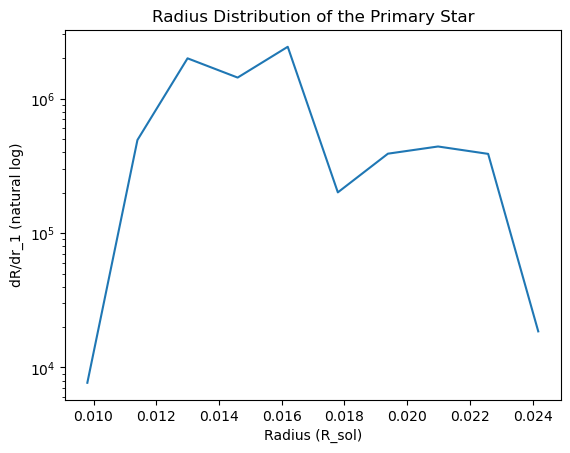

In [55]:
# let's make a histogram of the radii of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(WDWD_RLOF_SYS['Radius(1)>MT'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(WDWD_RLOF_SYS['Mass(1)'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
plt.xlabel("Radius (R_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dr_1 (natural log)")
plt.title("Radius Distribution of the Primary Star")

Text(0.5, 1.0, 'Radius Distribution of the Secondary Star')

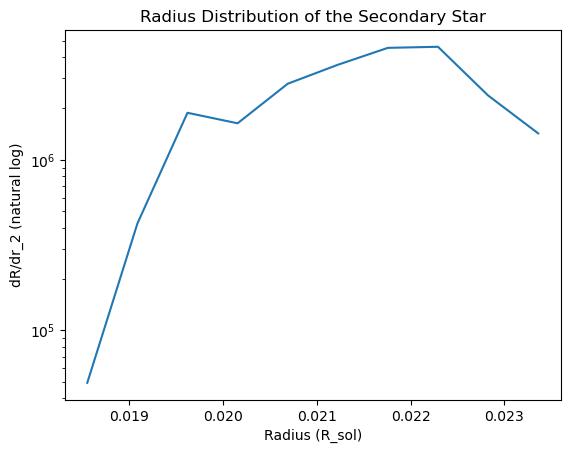

In [56]:
# let's make a histogram of the radii of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(WDWD_RLOF_SYS['Radius(2)>MT'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(WDWD_RLOF_SYS['Mass(1)'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
plt.xlabel("Radius (R_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dr_2 (natural log)")
plt.title("Radius Distribution of the Secondary Star")

#### Delay Time Distribution

In [ ]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(WDWD_SYS_LG['Time'])
t_col_lg = np.array(WDWD_SYS_LG['Coalescence_Time'])

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(WDWD_SYS_LG.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)
